In [1]:
import pandas as pd

import ast

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Jesse\Downloads\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply( lambda a : ast.literal_eval(a) if pd.notna(a) else a) 

In [2]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_us = df_us.dropna(subset= 'salary_year_avg')

df_us_1 = df_us.explode('job_skills')

df_us_1[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [4]:
df_us_1.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by= 'count', ascending= False)

df_us_skills = df_us_1.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by= 'count', ascending= False)

df_us_skills = df_us_skills.rename(columns= {'count': 'skill_count', 'median':'median_salary'})

df_us_skills

job_count_us = len(df_us)

job_count_us#4350

df_us_skills['skill_percent'] = df_us_skills['skill_count']/ job_count_us * 100

df_us_skills


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [5]:
skill_perc_limit = 5

df_us_skills_demand = df_us_skills[df_us_skills['skill_percent'] > skill_perc_limit]

df_us_skills_demand.index.name

'job_skills'

### NEXT LINE OF CODE IS USED TO CREATE A DATAFRAME CALLED TECHNOLOGY TO USE FOR MERGING WITH df_us_skills_demand

#### START

In [6]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

type(df_technology[1]) # its a str

df_technology[1]


"{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}"

In [7]:

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       
            technology_dict[key] = value  # if key does not exist in technology_dict, add key and value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['cognos',
  'tableau',
  'sharepoint',
  'ssrs',
  'ms access',
  'excel',
  'powerbi',
  'power bi',
  'sas',
  'sheets',
  'splunk',
  'esquisse',
  'microstrategy',
  'visio',
  'nuix',
  'alteryx',
  'ssis',
  'spreadsheet',
  'outlook',
  'powerpoint',
  'spss',
  'dax',
  'sap',
  'word',
  'qlik',
  'looker',
  'datarobot',
  'msaccess'],
 'programming': ['bash',
  'fortran',
  'sql',
  'go',
  'javascript',
  'typescript',
  'groovy',
  'vba',
  'shell',
  'sas',
  'no-sql',
  'objective-c',
  'vb.net',
  'nosql',
  'c',
  'lua',
  'python',
  't-sql',
  'sass',
  'f#',
  'delphi',
  'c++',
  'ocaml',
  'apl',
  'clojure',
  'pascal',
  'kotlin',
  'rust',
  'perl',
  'visual basic',
  'scala',
  'ruby',
  'solidity',
  'html',
  'elixir',
  'visualbasic',
  'cobol',
  'java',
  'erlang',
  'golang',
  'julia',
  'r',
  'crystal',
  'haskell',
  'mongo',
  'matlab',
  'swift',
  'dart',
  'php',
  'mongodb',
  'lisp',
  'c#',
  'powershell',
  'assembly',
  '

In [8]:
# convert the dict into a list of tupples and then convert the list into a data fram containing new columns called technology and skills
# each column will have the corresponding key and value from the list of tupples
df_technology = pd.DataFrame(list(technology_dict.items()), columns= ['technology', 'skills']) 

df_technology.explode('skills')

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,cognos
0,analyst_tools,tableau
0,analyst_tools,sharepoint
0,analyst_tools,ssrs
0,analyst_tools,ms access
...,...,...
9,sync,microsoft teams
9,sync,wire
9,sync,unify
9,sync,ringcentral


#### END

In [9]:
df_us_skills_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [10]:
df_merged = df_us_skills_demand.merge(df_technology, left_on= 'job_skills', right_on= 'skills')

df_merged

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


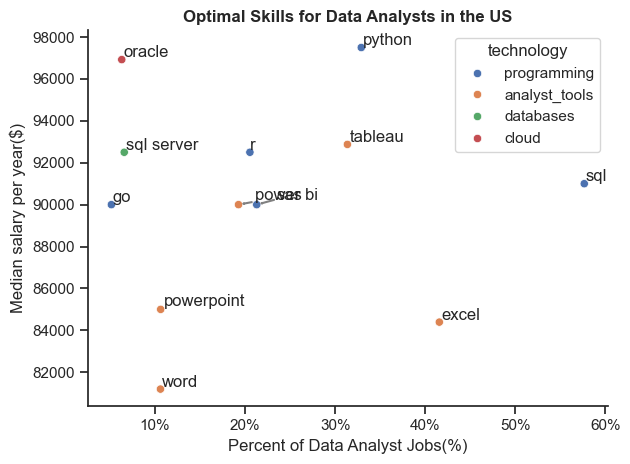

In [13]:
from adjustText import adjust_text

#changed from using matplotlib to seaborn for better visuals and color coding the skills to fit the technology they match to

#df_us_skills_demand.plot(kind= 'scatter', x= 'skill_percent', y= 'median_salary')
sns.scatterplot(data= df_merged, x= 'skill_percent', y= 'median_salary', hue= 'technology')
sns.despine()
sns.set_theme(style='ticks')

plt.title('Optimal Skills for Data Analysts in the US', fontweight='bold')
plt.xlabel('Percent of Data Analyst Jobs(%)')
plt.ylabel('Median salary per year($)')
plt.tight_layout()


texts = []

for i,txt in enumerate(df_us_skills_demand.index):
    texts.append(plt.text(df_us_skills_demand['skill_percent'].iloc[i], df_us_skills_demand['median_salary'].iloc[i], txt))
 
adjust_text(texts, arrowprops= dict(arrowstyle= '->', color= 'gray', lw=1.5)) #responsible for the indicator arrows inside the graph



#change the numbers in the x axis into percentages
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))

plt.show()

## REWROTE THE NEXT LINE OF CODE INCLUDING SNIPPETS OF THE ABOVE CODE TO FIX THE OVERLAPPING SKILLS IN THE MIDDLE

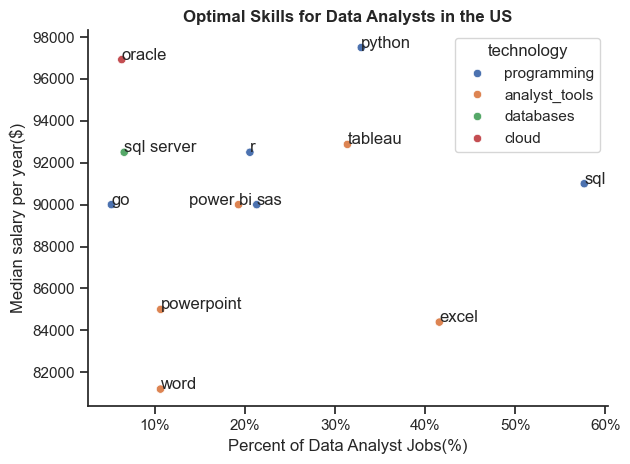

In [12]:
from adjustText import adjust_text

#changed from using matplotlib to seaborn for better visuals and color coding the skills to fit the technology they match to

#df_us_skills_demand.plot(kind= 'scatter', x= 'skill_percent', y= 'median_salary')
sns.scatterplot(data= df_merged, x= 'skill_percent', y= 'median_salary', hue= 'technology')
sns.despine()
sns.set_theme(style='ticks')

plt.title('Optimal Skills for Data Analysts in the US', fontweight= 'bold')
plt.xlabel('Percent of Data Analyst Jobs(%)')
plt.ylabel('Median salary per year($)')
plt.tight_layout()


# Function to adjust text positions in the midddle to avoid overlap

def adjust_text_position(x, y, texts, offset=5.5):
    directions = [(offset, 0), (-offset, 0), (0, offset), (0, -offset)]  # Right, Left, Up, Down
    while any((abs(x - tx) < offset and abs(y - ty) < offset) for tx, ty in texts):
        # Try different directions
        for dx, dy in directions:
            new_x = x + dx
            new_y = y + dy
            if not any((abs(new_x - tx) < offset and abs(new_y - ty) < offset) for tx, ty in texts):
                return new_x, new_y
        # If all directions are occupied, increment offset
        offset *= 1.5
    return x, y

# List to store text positions
text_positions = []

# Add text labels with manual adjustment
for i, txt in enumerate(df_us_skills_demand.index):
    x = df_us_skills_demand['skill_percent'].iloc[i]
    y = df_us_skills_demand['median_salary'].iloc[i]
    x, y = adjust_text_position(x, y, text_positions)
    plt.text(x, y, txt)
    text_positions.append((x, y))

#change the numbers in the x axis into percentages
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))

plt.show()